<a href="https://colab.research.google.com/github/DaniHisayasu/DataTwitter-Eleitoral/blob/main/Etapa_4_An%C3%A1lisede_Sentimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns


#Processamento de Linguagem Natural
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
dataframe_sentimento = pd.read_csv('dataframe_final_candidatos_pronto_para_sentimento.csv')

In [ ]:
analisador_de_texto = SentimentIntensityAnalyzer()

In [ ]:
dataframe_sentimento['Sentimentos'] = dataframe_sentimento['Tweet_limpo'].apply(lambda i: analisador_de_texto.polarity_scores(' '.join(re.findall(r'\w+',i.lower()))))

In [ ]:
dataframe_sentimento.head()

,Data_Hora,IdTweet,Tweet,Candidato,Tweet_limpo,Sentimentos
0,2022-07-31 14:01:50+00:00,1553742738964758531,Acho impressionante como Ciro Gomes e sua mili...,Ciro,acho impressionante como ciro gomes e sua mili...,"{'neg': 0.145, 'neu': 0.855, 'pos': 0.0, 'comp..."
1,2022-07-31 14:01:49+00:00,1553742734753759232,@LulaOficial Viajar de aviao não é sinal de pr...,Ciro,viajar de aviao não é sinal de progresso. voc...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,2022-07-31 14:01:44+00:00,1553742711307526145,@Analises2022 @CentralEleicoes Lula age na sur...,Ciro,"lula age na surdina, ele não xinga, ele sabo...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,2022-07-31 14:01:40+00:00,1553742696753336320,@dbenndorf Bom é o seu. De que Ciro que perde ...,Ciro,bom é o seu. de que ciro que perde pro jair (...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,2022-07-31 14:01:39+00:00,1553742691166453766,@CEduardoMaciel @CamiloSantanaCE É Elmano!!! Q...,Ciro,é elmano!!! quem errou foi ciro que está aju...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [ ]:
dataframe_sentimento['Sentimentos']

0      {'neg': 0.145, 'neu': 0.855, 'pos': 0.0, 'comp...
1      {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2      {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
3      {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4      {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
                             ...                        
148    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
149    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
150    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
151    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
152    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: Sentimentos, Length: 153, dtype: object

In [ ]:
dataframe_sentimento['Positivo'] = dataframe_sentimento['Sentimentos'].apply(lambda i:i['pos'])
dataframe_sentimento['Negativo'] = dataframe_sentimento['Sentimentos'].apply(lambda i:i['neg'])
dataframe_sentimento['Neutro'] = dataframe_sentimento['Sentimentos'].apply(lambda i:i['neu'])
dataframe_sentimento['Composicao'] = dataframe_sentimento['Sentimentos'].apply(lambda i:i['compound'])

In [ ]:
dataframe_sentimento.head()

,Data_Hora,IdTweet,Tweet,Candidato,Tweet_limpo,Sentimentos,Positivo,Negativo,Neutro,Composição,Composicao
0,2022-07-31 14:01:50+00:00,1553742738964758531,Acho impressionante como Ciro Gomes e sua mili...,Ciro,acho impressionante como ciro gomes e sua mili...,"{'neg': 0.145, 'neu': 0.855, 'pos': 0.0, 'comp...",0.0,0.145,0.855,-0.296,-0.296
1,2022-07-31 14:01:49+00:00,1553742734753759232,@LulaOficial Viajar de aviao não é sinal de pr...,Ciro,viajar de aviao não é sinal de progresso. voc...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.000,0.000
2,2022-07-31 14:01:44+00:00,1553742711307526145,@Analises2022 @CentralEleicoes Lula age na sur...,Ciro,"lula age na surdina, ele não xinga, ele sabo...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.000,0.000
3,2022-07-31 14:01:40+00:00,1553742696753336320,@dbenndorf Bom é o seu. De que Ciro que perde ...,Ciro,bom é o seu. de que ciro que perde pro jair (...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.000,0.000
4,2022-07-31 14:01:39+00:00,1553742691166453766,@CEduardoMaciel @CamiloSantanaCE É Elmano!!! Q...,Ciro,é elmano!!! quem errou foi ciro que está aju...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.000,0.000


In [ ]:
sentimento = []

In [ ]:
for i in dataframe_sentimento['Composicao']:
  if i >= 0.05:
    sentimento.append('Positivo')
  elif i <= (-0.05):
    sentimento.append('Negativo')
  else:
    sentimento.append('Neutro')

In [ ]:
dataframe_sentimento['Sentimento_Final'] = sentimento

In [ ]:
dataframe_sentimento.head()

,Data_Hora,IdTweet,Tweet,Candidato,Tweet_limpo,Sentimentos,Positivo,Negativo,Neutro,Composição,Composicao,Sentimento_Final
0,2022-07-31 14:01:50+00:00,1553742738964758531,Acho impressionante como Ciro Gomes e sua mili...,Ciro,acho impressionante como ciro gomes e sua mili...,"{'neg': 0.145, 'neu': 0.855, 'pos': 0.0, 'comp...",0.0,0.145,0.855,-0.296,-0.296,Negativo
1,2022-07-31 14:01:49+00:00,1553742734753759232,@LulaOficial Viajar de aviao não é sinal de pr...,Ciro,viajar de aviao não é sinal de progresso. voc...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.000,0.000,Neutro
2,2022-07-31 14:01:44+00:00,1553742711307526145,@Analises2022 @CentralEleicoes Lula age na sur...,Ciro,"lula age na surdina, ele não xinga, ele sabo...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.000,0.000,Neutro
3,2022-07-31 14:01:40+00:00,1553742696753336320,@dbenndorf Bom é o seu. De que Ciro que perde ...,Ciro,bom é o seu. de que ciro que perde pro jair (...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.000,0.000,Neutro
4,2022-07-31 14:01:39+00:00,1553742691166453766,@CEduardoMaciel @CamiloSantanaCE É Elmano!!! Q...,Ciro,é elmano!!! quem errou foi ciro que está aju...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.000,0.000,Neutro


In [ ]:
dataframe_sentimento['Sentimento_Final'].value_counts()

Neutro      128
Negativo     21
Positivo      4
Name: Sentimento_Final, dtype: int64

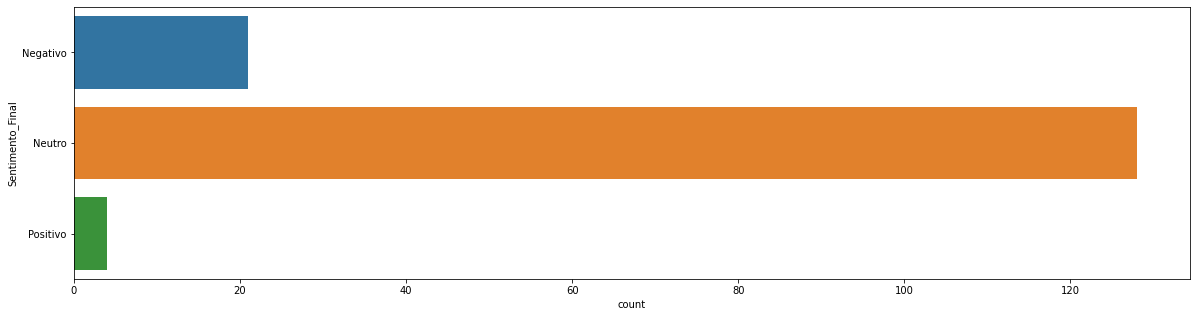

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(y='Sentimento_Final', data=dataframe_sentimento)

##Lula

In [ ]:
resultado_filtro_lula = dataframe_sentimento[dataframe_sentimento['Candidato'] == 'Lula']

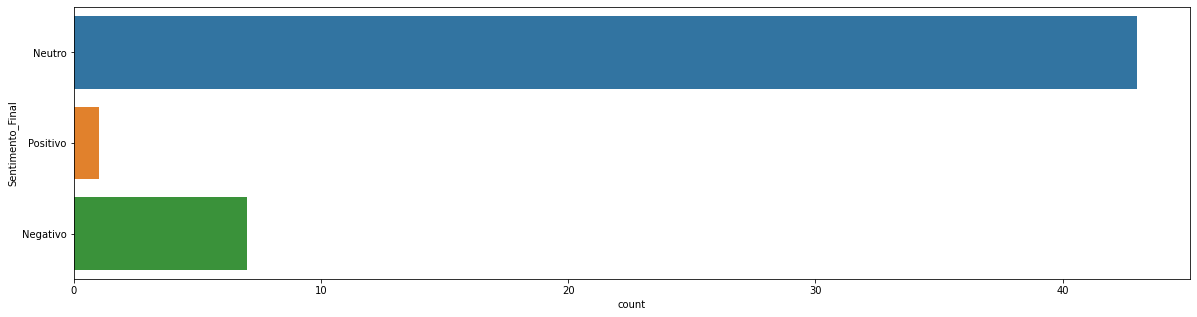

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(y='Sentimento_Final', data=resultado_filtro_lula)

##Bolsonaro

In [ ]:
resultado_filtro_bolsonaro = dataframe_sentimento[dataframe_sentimento['Candidato'] == 'Bolsonaro']

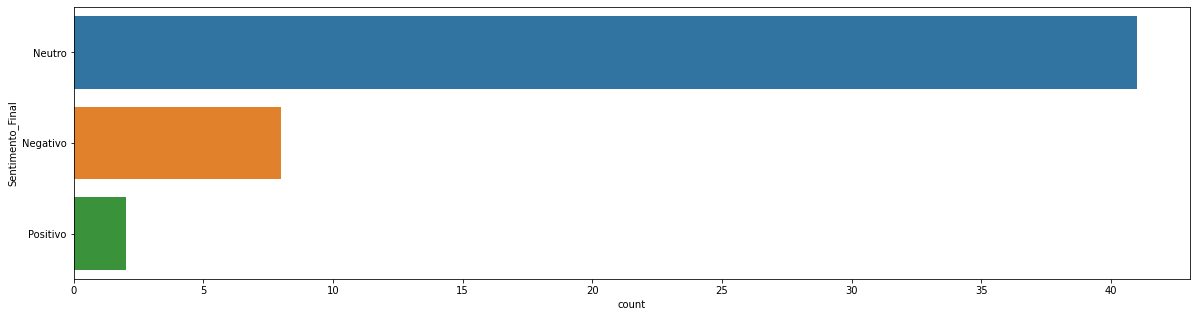

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(y='Sentimento_Final', data=resultado_filtro_bolsonaro)

In [ ]:
dataframe_final = dataframe_sentimento[['Data_Hora','IdTweet','Tweet','Candidato','Tweet_limpo','Sentimento_Final']]

In [ ]:
dataframe_final.head()

,Data_Hora,IdTweet,Tweet,Candidato,Tweet_limpo,Sentimento_Final
0,2022-07-31 14:01:50+00:00,1553742738964758531,Acho impressionante como Ciro Gomes e sua mili...,Ciro,acho impressionante como ciro gomes e sua mili...,Negativo
1,2022-07-31 14:01:49+00:00,1553742734753759232,@LulaOficial Viajar de aviao não é sinal de pr...,Ciro,viajar de aviao não é sinal de progresso. voc...,Neutro
2,2022-07-31 14:01:44+00:00,1553742711307526145,@Analises2022 @CentralEleicoes Lula age na sur...,Ciro,"lula age na surdina, ele não xinga, ele sabo...",Neutro
3,2022-07-31 14:01:40+00:00,1553742696753336320,@dbenndorf Bom é o seu. De que Ciro que perde ...,Ciro,bom é o seu. de que ciro que perde pro jair (...,Neutro
4,2022-07-31 14:01:39+00:00,1553742691166453766,@CEduardoMaciel @CamiloSantanaCE É Elmano!!! Q...,Ciro,é elmano!!! quem errou foi ciro que está aju...,Neutro


In [ ]:
dataframe_final.to_csv('dataframe_final.csv',sep=',', index=False)